# ENGR 1330 – Computational Thinking and Data Science
Chelsea Sinnya, Ishu Basnet, Hyunseo Cho

## Red Wine Quality Final Project - Background
In this project, a dataset related to red wine samples from the northwest region of Portugal will
be analyzed. The quality of a red wine that is determined via a sensory test is dependent on many different
physicochemical properties, namely, fixed acidity, volatile acidity, pH value, density, etc. A file named
‘winequality-red.csv’ contains information about different varieties of red wine and their quality that
depends on several physicochemical properties like the ones mentioned above. Specifically, in the dataset, there is a quality score (QS) ranging from 3 to 8 that is given to each variety of red wine depending on 11 different properties. For this project, consider that a good wine is one with a quality score of
QS ≥ 6 and a bad wine is one with a quality score of QS ≤ 5. The objective of this problem is to
classify whether the wine is good or bad depending on the 11 different properties that are in the dataset.

## Required Tasks:
(a) Literature review:
1) P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. Modeling wine preferences by data mining
from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. [Get
the research paper from Web of Science at TTU].

(b) Data acquisition:
1) Get the dataset required for this project from the following Kaggle website:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

(c) Exploratory data analysis
 1) Perform exploratory data analysis (getting information about the dataset, making plots, etc.)
 2) Modify the dataset as needed for performing the analysis

(d) Classification model
 1) Implement a classification algorithm from scratch as well as using the data science library to
classify good wines and bad wines
 2) Evaluate the model by computing the necessary evaluation metrics from scratch as well as using
the data science library


### **Importing all libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

### **Reading the CSV file into a variable 'RW' i.e short for RedWine**

In [2]:
#reading the first 12 datas of the csv  file
RW= pd.read_csv('redwinequality.csv')
RW.head(12)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   
11            7.5              0.50         0.36             6.1      0.071   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5

In [3]:
RW['QualityCheck']=(RW['quality']>=6).astype('uint8')
RW.head(12)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   
11            7.5              0.50         0.36             6.1      0.071   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   

    alcohol  quality  QualityCheck  
0       9.4        5             0  
1       9.8        5             0  
2       9.8        5             0  
3       9.8        6             1  
4       9.4        5             0  
5       9.4        5             0  
6       9.4        5             0  
7      10.0        7             1  
8       9.5        7             1  
9      10.5        5             0  
10      9.2        5             0  
11     10.5        5             0

In [4]:
RW.shape

(1599, 13)

In [7]:
RW.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  QualityCheck  
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000  
mean      3.311113     0.658149    10.422983     5.636023      0.534709  
std       0.154386     0.169507     1.065668     0.807569      0.498950  
min       2.740000     0.330000     8.400000     3.000000      0.000000  
25%       3.210000     0.550000     9.500000     5.000000      0.000000  
50%       3.310000     0.620000    10.200000     6.000000      1.000000  
75%       3.400000     0.730000    11.100000     6.000000      1.000000  
max       4.010000     2.000000    14.900000     8.000000      1.000000

In [8]:
RW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  QualityCheck          1599 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 151.6 KB


In [9]:
RW.isnull()
sum=RW.isnull().sum()
print('The total number of Null values:',sum)

The total number of Null values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
QualityCheck            0
dtype: int64


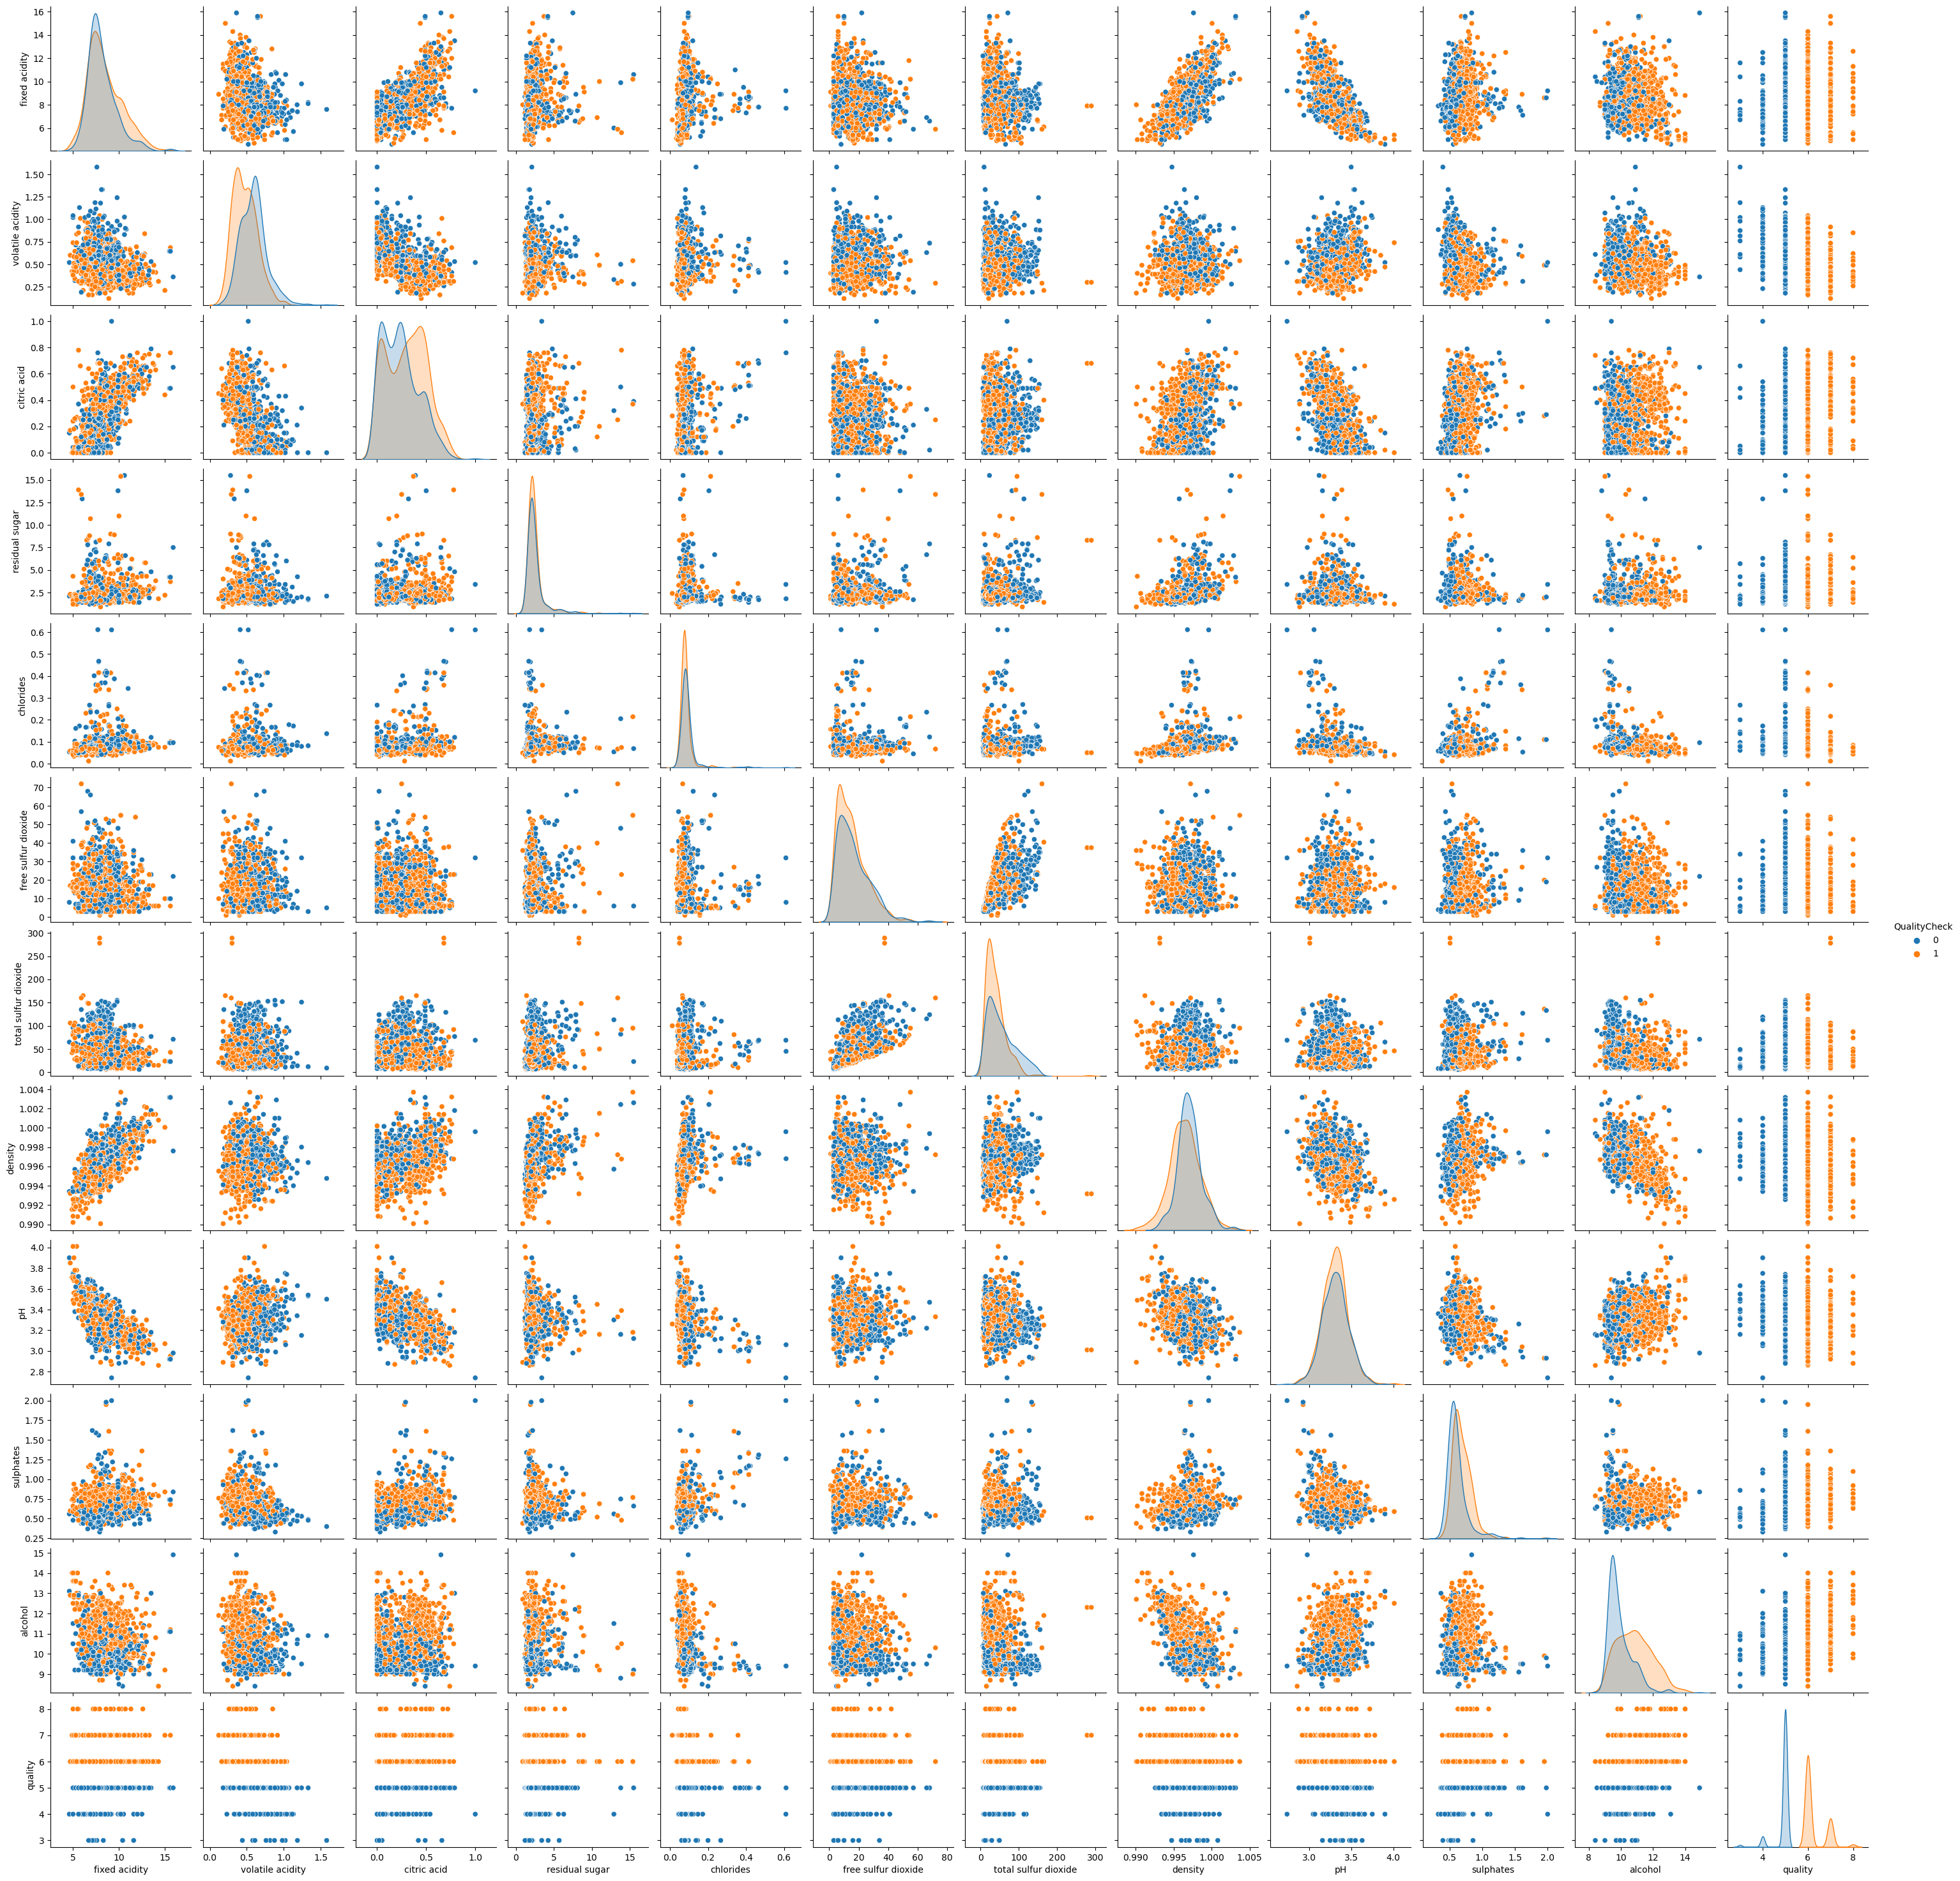

In [11]:
sns.pairplot(RW, hue='QualityCheck')

In [16]:
#Copying the original dataframe and picking the columns of interest
winequality=RW.copy()
winequality=winequality.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]]
winequality.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  QualityCheck  
0      9.4             0  
1      9.8             0  
2      9.8             0  
3      9.8             1  
4      9.4             0  
5      9.4             0  
6      9.4             0  
7     10.0             1  
8      9.5             1  
9     10.5             0

<Axes: xlabel='QualityCheck', ylabel='count'>

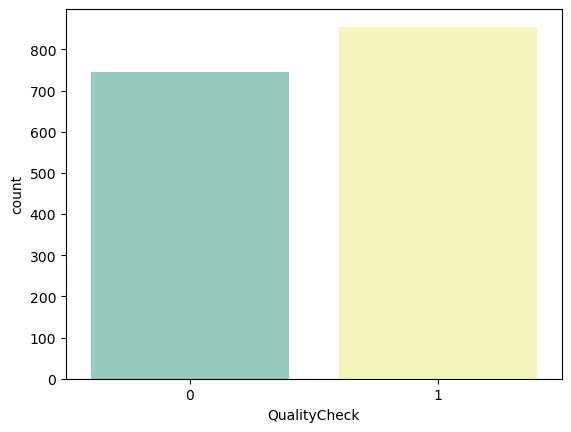

In [28]:
sns.countplot(x=winequality['QualityCheck'],palette='Set3')

In [30]:
correlation=winequality.corr()
correlation

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
QualityCheck               0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
QualityCheck               -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
QualityCheck                     -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol  QualityCheck  
fixed acidity        -0.061668      0.095093  
volatile acidity     -0.202288     -0.321441  
citric acid           0.109903      0.159129  
residual sugar        0.042075     -0.002160  
chlorides            -0.221141     -0.109494  
free sulfur dioxide  -0.069408     -0.061757  
total sulfur dioxide -0.205654     -0.231963  
density              -0.496180     -0.159110  
pH                    0.205633     -0.003264  
sulphates             0.093595      0.218072  
alcohol               1.000000      0.434751  
QualityCheck          0.434751      1.000000

<Axes: >

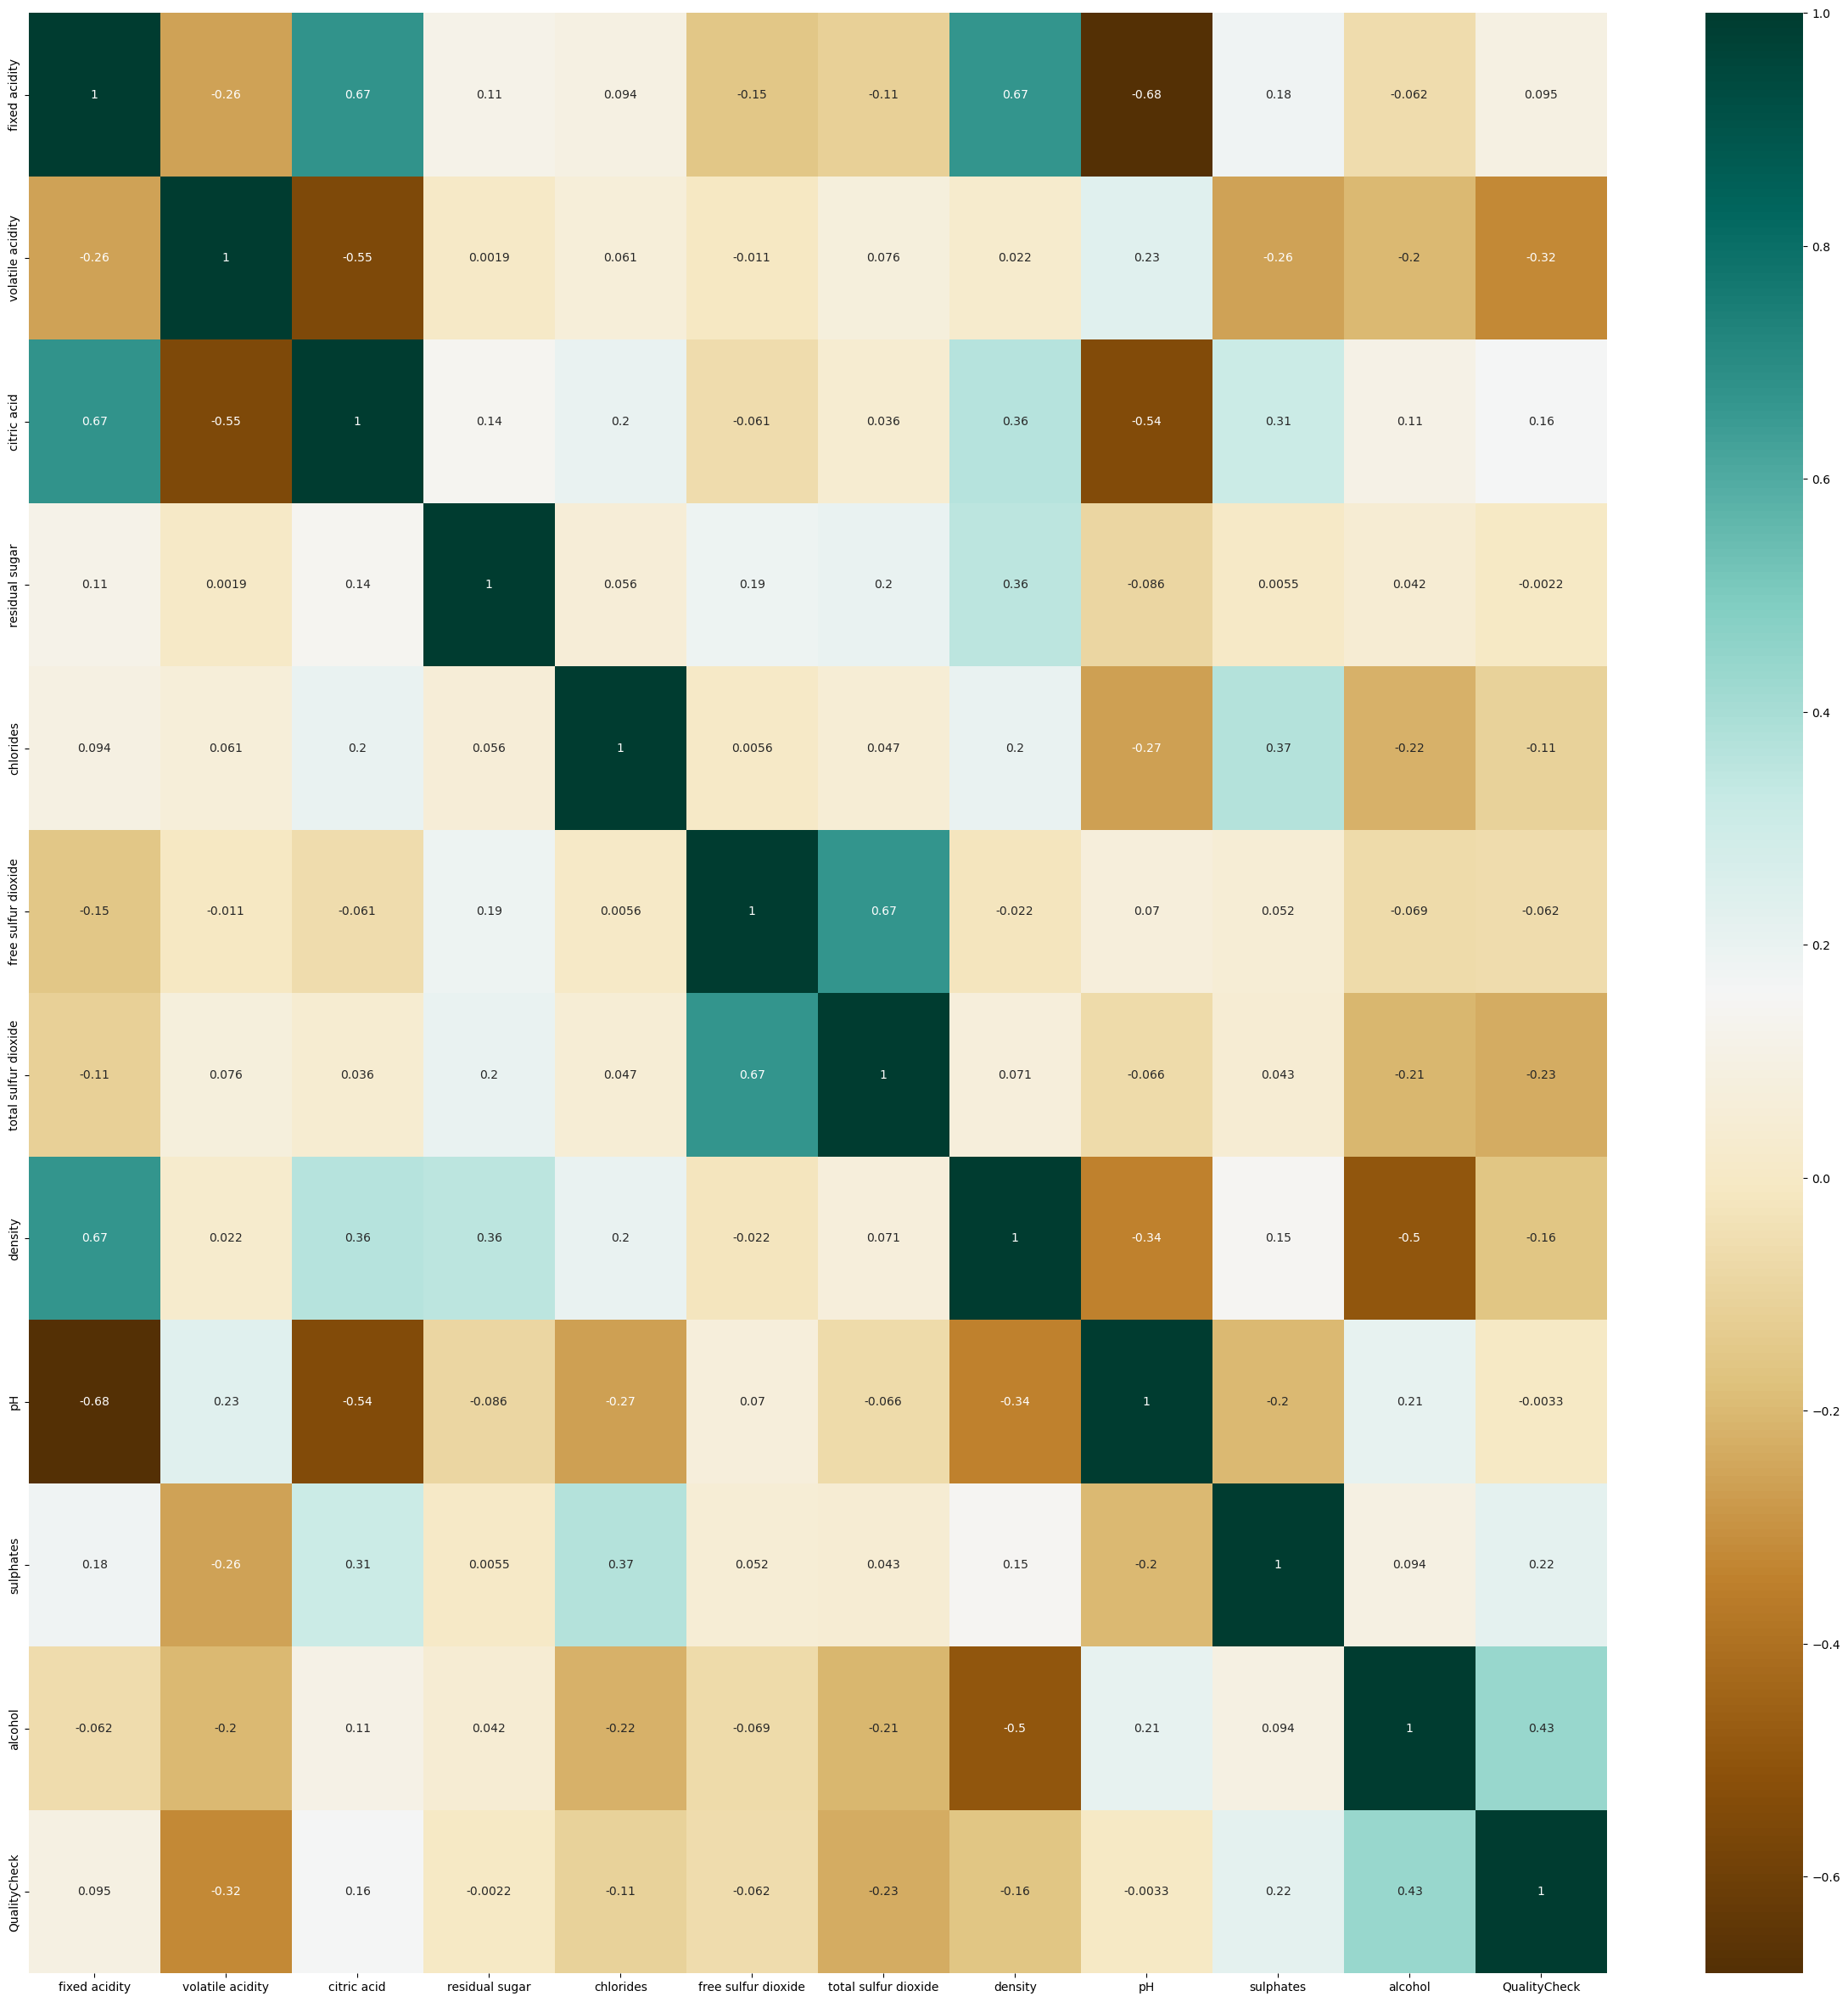

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot= True, cmap='BrBG')

In [35]:
#converting all the variables into standard units
winequality['fixed acidity (standard)']=(winequality['fixed acidity']-np.mean(winequality['fixed acidity']))/np.std(winequality['fixed acidity'])
winequality['volatile acidity (standard)']=(winequality['volatile acidity']-np.mean(winequality['volatile acidity']))/np.std(winequality['volatile acidity'])
winequality['citric acid (standard)']=(winequality['citric acid']-np.mean(winequality['citric acid']))/np.std(winequality['citric acid'])
winequality['residual sugar (standard)']=(winequality['residual sugar']-np.mean(winequality['residual sugar']))/np.std(winequality['residual sugar'])
winequality['chlorides (standard)']=(winequality['chlorides']-np.mean(winequality['chlorides']))/np.std(winequality['chlorides'])
winequality['free sulfur dioxide (standard)']=(winequality['free sulfur dioxide']-np.mean(winequality['free sulfur dioxide']))/np.std(winequality['free sulfur dioxide'])
winequality['total sulfur dioxide (standard)']=(winequality['total sulfur dioxide']-np.mean(winequality['total sulfur dioxide']))/np.std(winequality['total sulfur dioxide'])                                                                                             
winequality['density (standard)']=(winequality['density']-np.mean(winequality['density']))/np.std(winequality['density'])
winequality['pH (standard)']=(winequality['pH']-np.mean(winequality['pH']))/np.std(winequality['pH'])
winequality['sulphates (standard)']=(winequality['sulphates']-np.mean(winequality['sulphates']))/np.std(winequality['sulphates'])
winequality['alcohol (standard)']=(winequality['alcohol']-np.mean(winequality['alcohol']))/np.std(winequality['alcohol'])
winequality.head(13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  ...  \
0                  11.0                  34.0   0.9978  3.51       0.56  ...   
1                  25.0                  67.0   0.9968  3.20       0.68  ...   
2                  15.0                  54.0   0.9970  3.26       0.65  ...   
3                  17.0                  60.0   0.9980  3.16       0.58  ...   
4                  11.0                  34.0   0.9978  3.51       0.56  ...   
5                  13.0                  40.0   0.9978  3.51       0.56  ...   
6                  15.0                  59.0   0.9964  3.30       0.46  ...   
7                  15.0                  21.0   0.9946  3.39       0.47  ...   
8                   9.0                  18.0   0.9968  3.36       0.57  ...   
9                  17.0                 102.0   0.9978  3.35       0.80  ...   
10                 15.0                  65.0   0.9959  3.28       0.54  ...   
11                 17.0                 102.0   0.9978  3.35       0.80  ...   
12                 16.0                  59.0   0.9943  3.58       0.52  ...   

    volatile acidity (standard)  citric acid (standard)  \
0                      0.961877               -1.391472   
1                      1.967442               -1.391472   
2                      1.297065               -1.186070   
3                     -1.384443                1.484154   
4                      0.961877               -1.391472   
5                      0.738418               -1.391472   
6                      0.403229               -1.083370   
7                      0.682553               -1.391472   
8                      0.291499               -1.288771   
9                     -0.155419                0.457144   
10                     0.291499               -0.980669   
11                    -0.155419                0.457144   
12                     0.487026               -1.391472   

    residual sugar (standard)  chlorides (standard)  \
0                   -0.453218             -0.243707   
1                    0.043416              0.223875   
2                   -0.169427              0.096353   
3                   -0.453218             -0.264960   
4                   -0.453218             -0.243707   
5                   -0.524166             -0.264960   
6                   -0.666062             -0.392483   
7                   -0.949853             -0.477498   
8                   -0.382271             -0.307468   
9                    2.526589             -0.349975   
10                  -0.524166              0.202621   
11                   2.526589             -0.349975   
12                  -0.666062              0.032592   

    free sulfur dioxide (standard)  total sulfur dioxide (standard)  \
0                        -0.466193                        -0.379133   
1                         0.872638  

In [41]:
#Shuffling all the data of rows of 'winequality'
random=winequality.sample(len(winequality.axes[0]), replace = False)

#Splitting data into train set(70% of 1599=1119)
training_set=random.iloc[0:1119, :]

#Splitting data into test set(30% of 1599=480)
test_set=random.iloc[1119:, :]
print('Number of rows in training set is: ', len(training_set))
print('Number of rows in testing set is: ', len(test_set))

Number of rows in training set is:  1119
Number of rows in testing set is:  480


In [42]:
x_train = training_set.iloc[:, 5:9].values
y_train = training_set.iloc[:, 4].values
y_train = np.reshape(y_train, (len(y_train), 1))

x_test = test_set.iloc[:, 5:9].values
y_test = test_set.iloc[:, 4].values
y_test = np.reshape(y_test, (len(y_test), 1))

print("x_train_Shape:", np.shape(x_train))
print("y_train_Shape:", np.shape(y_train))

print("x_test_Shape:", np.shape(x_test))
print("y_test_Shape:", np.shape(y_test))

x_train_Shape: (1119, 4)
y_train_Shape: (1119, 1)
x_test_Shape: (480, 4)
y_test_Shape: (480, 1)


In [46]:
#Selecting the independent features of 'winequality' as X_train and X_test
x_train=training_set.iloc[:, 12:].values
x_test=test_set.iloc[:, 12:].values

#Selecting the target variable of 'winequality' as Y_train and Y_test
y_train=training_set.iloc[:, 11].values
y_test=test_set.iloc[:, 11].values

#Reshaping the target variable of 'winequality'
y_train=np.reshape(y_train, (len(y_train), 1))
y_test=np.reshape(y_test, (len(y_test), 1))

#Displaying the shape of matrix of train set
print("X_train_Shape:", np.shape(x_train))
print("Y_train_Shape:", np.shape(y_train))

#Displaying the shape of matrix of test set
print("X_test_Shape:", np.shape(x_test))
print("Y_test_Shape:", np.shape(y_test))

X_train_Shape: (1119, 11)
Y_train_Shape: (1119, 1)
X_test_Shape: (480, 11)
Y_test_Shape: (480, 1)


In [47]:
x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
print("x_train_Aug:", np.shape(x_train_Aug))

x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
print("x_test_Aug:", np.shape(x_test_Aug))

x_train_Aug: (12, 1119)
x_test_Aug: (12, 480)


In [48]:
theta=np.zeros((12,1))
print("Shape of Theta is: ", np.shape(theta))

Shape of Theta is:  (12, 1)


In [66]:
no_of_iteration = np.arange(1, 40001)
alpha = 0.004
m_train = len(x_train)
m_test = len(x_test)

costfunc = []

#Iteration loop
for i in no_of_iter:
    Z = np.transpose(theta)@x_train_Aug
    p = 1/(1+np.exp(-Z))
    ft = ((np.log10(1/(1+np.exp(-Z))))@y_train)[0,0]  
    st = ((np.log10(1-(1/(1+np.exp(-Z)))))@(1-y_train))[0,0]
    cf = (1/m_train)*(-ft-st) #Cost function
    costfunc.append(cf)
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(p)-y_train)) #Derivative of cost function
    theta = theta - (alpha*delthetaj) #Updating theta values
    
print(len(costfunc))
print(theta)

40000
[[ 0.26621659]
 [ 0.08471684]
 [-0.5728926 ]
 [-0.21277094]
 [ 0.04702303]
 [-0.20179185]
 [ 0.09502041]
 [-0.38973449]
 [-0.02531921]
 [-0.12099211]
 [ 0.54002335]
 [ 0.98045832]]


In [67]:

y_train_pred = np.zeros((m_train,1))
h_Theta = np.transpose(theta)@x_train_Aug
h_Theta_trans = np.transpose(h_Theta)


#Comparing predicted and actual results

for j in range(m_train):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        y_train_pred[j] = [1]
    else: 
        y_train_pred[j] = [0]
#Printing out training sample
print("Training Sample: ", y_train)

#Priniting our predicted training sample
print("Predicted Training Sample: ", y_train_pred)

Training Sample:  [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]
Predicted Training Sample:  [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [68]:

y_test_pred = np.zeros((m_test,1))
h_Theta = np.transpose(theta)@x_test_Aug
h_Theta_trans = np.transpose(h_Theta)


#Comparing predicted and actual results

for j in range(m_test):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        y_test_pred[j] = [1]
    else: 
        y_test_pred[j] = [0]
#Printing out testing sample
print("Testing Sample: ", y_test)

#Priniting our predicted testing sample
print("Predicted Testing Sample: ", y_test_pred)

Testing Sample:  [[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1

In [69]:
plt.plot(no_of_iteration,costfunc, color='pink', linewidth='2')
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Number of iterations")

Text(0.5, 1.0, 'Cost Function vs. Number of iterations')

In [70]:
#Model evaluation on the training set

#True positive

count_TP=0
for TP in range(m_train):
    if (y_train_pred[TP] == 1) & (y_train[TP] == 1): 
        count_TP = count_TP+1
print("True_Positives:",count_TP)


#False positive
count_FP=0
for FP in range(m_train):
    if (y_train_pred[FP] == 1) & (y_train[FP] == 0): 
        count_FP = count_FP+1
print("False Positives:",count_FP)


#True negative
count_TN=0
for TN in range(m_train):
    if (y_train_pred[TN] == 0) & (y_train[TN] == 0): 
        count_TN = count_TN+1
print("True Negatives:",count_TN)


#False negative
count_FN=0
for FN in range(m_train):
    if (y_train_pred[FN] == 0) & (y_train[FN] == 1): 
        count_FN = count_FN+1
print("False Negatives:",count_FN)

Accuracy = (count_TP+count_TN)/m_train
print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)
print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)
print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

True_Positives: 454
False Positives: 137
True Negatives: 376
False Negatives: 152
Accuracy: 0.741733690795353
Precision: 0.7681895093062606
Recall: 0.7491749174917491
F1_Score: 0.758563074352548


In [71]:
#Model evaluation on the test set

#True positive

count_TP=0
for TP in range(m_test):
    if (y_test_pred[TP] == 1) & (y_test[TP] == 1): 
        count_TP = count_TP+1
print("True_Positives:",count_TP)


#False positive
count_FP=0
for FP in range(m_test):
    if (y_test_pred[FP] == 1) & (y_test[FP] == 0): 
        count_FP = count_FP+1
print("False Positives:",count_FP)


#True negative
count_TN=0
for TN in range(m_test):
    if (y_test_pred[TN] == 0) & (y_test[TN] == 0): 
        count_TN = count_TN+1
print("True Negatives:",count_TN)


#False negative
count_FN=0
for FN in range(m_test):
    if (y_test_pred[FN] == 0) & (y_test[FN] == 1): 
        count_FN = count_FN+1
print("False Negatives:",count_FN)

Accuracy = (count_TP+count_TN)/m_test
print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)
print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)
print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

True_Positives: 187
False Positives: 57
True Negatives: 174
False Negatives: 62
Accuracy: 0.7520833333333333
Precision: 0.7663934426229508
Recall: 0.751004016064257
F1_Score: 0.7586206896551724


In [84]:
#Importing module for training and testing samples
from sklearn.model_selection import train_test_split
#Importing module for model development and prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#Importing modules for evaluating performance of classification model
from sklearn import metrics
#Importing module for showing text report of classification mode
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [85]:
RW.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  QualityCheck  
0      9.4        5             0  
1      9.8        5             0  
2      9.8        5             0  
3      9.8        6             1  
4      9.4        5             0

In [86]:
#Selecting the independent features of 'winequality'
X=RW[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
#Selecting dependent or target variable of 'winequality'
Y=RW.QualityCheck

In [87]:
#Converting features to their standard unit using Sklearn library function
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X.astype(float))
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [88]:
#Splitting our independent feature(X) and dependepent variable(Y) into train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30,random_state=0)

In [89]:
#Printing the length of training(70%) and testing(30%) sets
print('Number of rows in training set is: ', len(X_train))
print('Number of rows in testing set is: ', len(X_test))

Number of rows in training set is:  1119
Number of rows in testing set is:  480


In [91]:
#Creating a logistic regression classifier object using logistic regression function for training our model
model=LogisticRegression(max_iter=50000, solver = 'lbfgs')
#Training a model
model.fit(X_train,Y_train)

LogisticRegression(max_iter=50000)

In [92]:
#Testing on a training set
Y_train_pred = model.predict(X_train)
Y_train_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [93]:
#Testing on a test set
Y_test_pred = model.predict(X_test)
Y_test_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [94]:
#Model Evaluation on training set
print(classification_report(Y_train,Y_train_pred))
print(confusion_matrix(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       518
           1       0.76      0.77      0.77       601

    accuracy                           0.75      1119
   macro avg       0.75      0.75      0.75      1119
weighted avg       0.75      0.75      0.75      1119

[[374 144]
 [139 462]]


In [95]:
#Model Evaluation on testing set
print(classification_report(Y_test,Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       226
           1       0.76      0.77      0.76       254

    accuracy                           0.75       480
   macro avg       0.75      0.74      0.74       480
weighted avg       0.75      0.75      0.75       480

[[163  63]
 [ 59 195]]


In [96]:
#Calculating accuracy of our trained model
print("Accuracy of model is: ", metrics.accuracy_score(Y_test, Y_test_pred))

#Calculating precision of our trained model
print("Precision of model is: ", metrics.precision_score(Y_test, Y_test_pred))

#Calculating recall of our trained model
print("Recall of model is: ", metrics.recall_score(Y_test, Y_test_pred))

#Calculating F1 score of our trained model
print("F1-score of model is: ", metrics.f1_score(Y_test, Y_test_pred))

Accuracy of model is:  0.7458333333333333
Precision of model is:  0.7558139534883721
Recall of model is:  0.7677165354330708
F1-score of model is:  0.76171875


In [97]:
#Providing reading of different parameters of 'winequality'
inputparameterreadings=(7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)
#Converting the input to an array
inputparameterreadings=np.array(inputparameterreadings)
#Reshaping the input array for this data only
inputparameterreadings=inputparameterreadings.reshape(1,-1)
#Making Prediction for the given data
prediction=model.predict(inputparameterreadings)
print(prediction)

[0]
